In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Housing (1).csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
# Doing analysis on overfitting with two columns only.
df1=df[['area','price']]

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
...,...,...
540,3000,1820000
541,2400,1767150
542,3620,1750000
543,2910,1750000


In [9]:
scaler=MinMaxScaler()
df2=scaler.fit_transform(df1)

In [14]:
df2=pd.DataFrame(df2)
df2.columns=df1.columns
df2

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364
...,...,...
540,0.092784,0.006061
541,0.051546,0.001485
542,0.135395,0.000000
543,0.086598,0.000000


<Axes: xlabel='area', ylabel='price'>

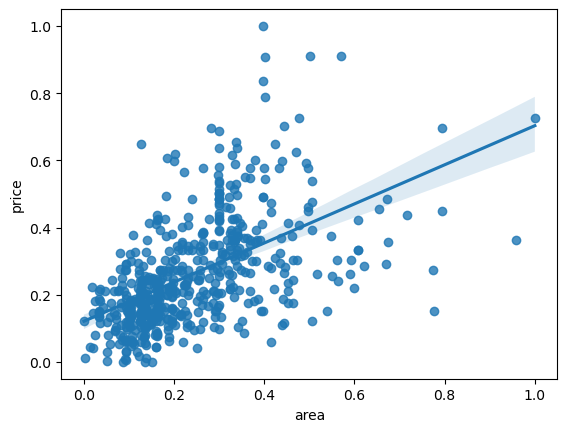

In [17]:
sns.regplot(x='area', y='price', data=df2)

In [18]:
df2_train, df2_test=train_test_split(df2,train_size=.7, test_size=.3, random_state=100)
print('train:',len(df2_train))
print('train:',len(df2_test))

train: 381
train: 164


In [20]:
X_train=df2_train['area']
X_train=X_train.values.reshape(-1,1)
y_train=df2_train['price']

X_test=df2_test['area']
X_test=X_test.values.reshape(-1,1)
y_test=df2_test['price']

### Poly reg
#### Linear ->  y = B0 + B1 . x1
#### Poly -> B0 + B1 . x1 + B2 . x2^2 ... Bn . xn^n

In [22]:
degrees = [1,2,3,6,10,20]

# matrices to store train and test prediction row is data point and column is degree of polynomial

y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test),len(degrees)))

for i, degree in enumerate(degrees) :
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train,y_train)

    # predict
    y_train_pred[:,i] = model.predict(X_train)
    y_test_pred[:,i] = model .predict(X_test)

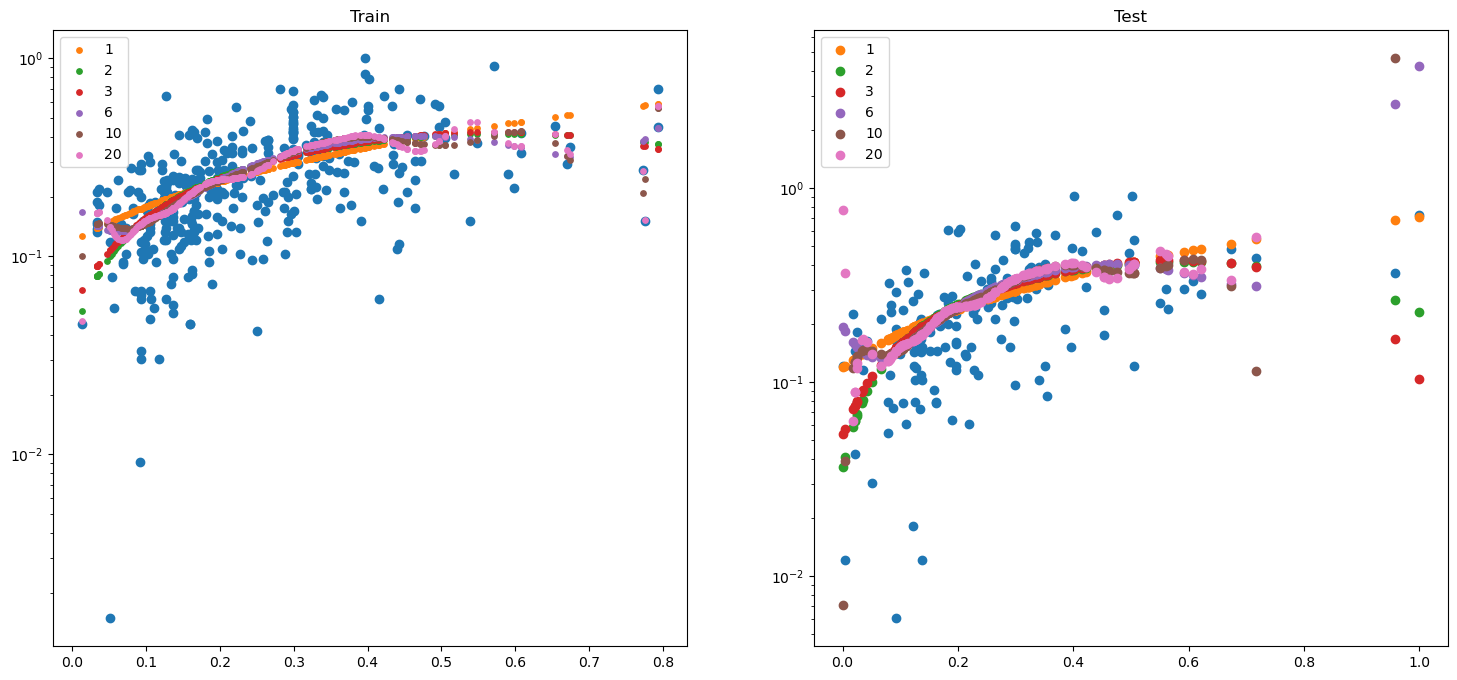

In [27]:
plt.figure(figsize=(18,8))

plt.subplot(121)
plt.scatter(X_train,y_train)
plt.yscale('log')
plt.title('Train')

for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')

plt.subplot(122)
plt.scatter(X_test,y_test)
plt.yscale('log')
plt.title('Test')

for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [28]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.28, test score=0.3
Polynomial degree 2: train score=0.33, test score=0.3
Polynomial degree 3: train score=0.33, test score=0.26
Polynomial degree 6: train score=0.34, test score=-3.37
Polynomial degree 10: train score=0.36, test score=-95.7
Polynomial degree 20: train score=0.37, test score=-2929154143814.42
